# Covid Data Analysis Exercise

## Prof. Carlo Contaldi (c.contaldi@imperial.ac.uk)

## Theoretical Physics Group

## 505 Huxley

This is an exercise in using time-ordered data for regression analysis and forecasting. 

- `Datetime` library is a very useful module that makes it very easy to treat time stamps and plotting time ordered data.
- `Pandas`. We will use Pandas to handle data efficiently.

- Visit https://coronavirus.data.gov.uk/ to look at the available data.
- https://coronavirus.data.gov.uk/details/developers-guide/main-api explains the API interface. You will need to install the `uk_covid19` package. If this is not possible you can also download metrics individually using the website. 

## Table of Contents

- [1 - Setup](#1)
- [2 - Importing UK COVID metrics](#2)
- [3 - Predictors](#3)
- [4 - Exercise](#4)
    - [4.1 - Data cleaning](#4-1)
    - [4.2 - multivariate Linear Regression](#4-2)
    - [4.3 - Prediction](#4-3)
    - [4.4 - Re-examine the data](#4-4)
    - [4.6 - Model Prediction](#4-6)
    - [4.7 - Try on Different Regression](#4-7)
    - [4.8 - Discussion](#4-8)



<a name='1'></a>
## 1. Setup

In [2]:
import pandas as pd
import datetime as dt
import numpy as np

import matplotlib.pylab as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
#Show plots inline
%matplotlib inline

#Some date formatters to use for plotting 
weeks = mdates.WeekdayLocator()
years = mdates.YearLocator()
months = mdates.MonthLocator()
weekdays = mdates.DayLocator()
dateFmt = mdates.DateFormatter('%b-%y')

In [3]:
#seaborn is a useful package for handling graphics and 
#producing publication quality images with better colour schemes
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_context("talk")
#sns.set(font_scale=1.5) 
#sns.set_context("poster")

plt.rcParams.update({'font.size': 32})
plt.rcParams.update({'lines.linewidth':3})

<a name='2'></a>
## 2. Importing UK COVID metrics

Next we can import the API package to download government covid metrics

Package install e.g.: `pip install uk-covid19`. If you are having trouble installing this I can provide the data.

This package is an interface to the UK government https://coronavirus.data.gov.uk/

We will use covid metrics as the dependent variables or outcomes in the regression problem.

In [4]:
from uk_covid19 import Cov19API

The following is an example download of covid cases, hospital occupancy and admissions, and deaths. You can query many othe metrics.

In [5]:
#Admin hierarchy of data (can also be regional and local)
areaType = 'nation'
area_filter = ['areaType={}'.format(areaType)]

#Form the API query
query = { "areaType":"areaType" ,"areaName":"areaName" ,"areaCode":"areaCode","specimenDate":"date"
         ,"dailyLabConfirmedCases":"newCasesBySpecimenDate","hospital":"hospitalCases"
         ,"newAdmissions":"newAdmissions","deaths":"newDeaths28DaysByDeathDate", 
         "cumPeopleVaccinatedFirstDoseByVaccinationDate":"cumPeopleVaccinatedFirstDoseByVaccinationDate"
         ,"cumPeopleVaccinatedSecondDoseByPublishDate":"cumPeopleVaccinatedSecondDoseByPublishDate"
        }
api_query = Cov19API(filters=area_filter, structure=query)
# display(api_query)

#return a pandas dataframe. Other formats can be used e.g. JSON etc.
df = api_query.get_dataframe()

#rename columns
df.columns = ['Area type', 'Area name', 'Area code', 'Date', 'Cases','Hospital', 'Admissions', 'Deaths','cumPeopleVaccinatedFirstDoseByVaccinationDate','cumPeopleVaccinatedCompleteByVaccinationDate']
#Re-index by date
df.set_index(pd.to_datetime(df['Date'], format='%Y-%m-%d'),inplace=True)
df.sort_index(inplace=True)
print(len(df))
df

2538


,Area type,Area name,Area code,Date,Cases,Hospital,Admissions,Deaths,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate
Date,,,,,,,,,,
2020-01-30,nation,England,E92000001,2020-01-30,2.0,NaN,NaN,NaN,NaN,NaN
2020-01-31,nation,England,E92000001,2020-01-31,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-01,nation,England,E92000001,2020-02-01,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-02,nation,England,E92000001,2020-02-02,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-03,nation,England,E92000001,2020-02-03,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-11-15,nation,Scotland,S92000003,2021-11-15,449.0,771.0,NaN,0.0,4327273.0,3930317.0
2021-11-15,nation,England,E92000001,2021-11-15,10309.0,6864.0,NaN,34.0,42047820.0,38605643.0
2021-11-15,nation,Northern Ireland,N92000002,2021-11-15,1772.0,429.0,19.0,6.0,NaN,1256509.0


In [6]:
#Select just England data but Wales, Scoltand, and Northern Ireland can also be chosen
df_Eng = df[df['Area name']=='England'].copy()
print(len(df_Eng))
# df_Eng.max()
# df_mask=df_Eng['Admissions']>=4000
# filtered_df = df_Eng[df_mask]
# filtered_df

657


In [7]:
df_mask=df_Eng['cumPeopleVaccinatedFirstDoseByVaccinationDate']>=0
filtered_df = df_Eng[df_mask]
filtered_df
# The vaccination started on 2020-12-08

,Area type,Area name,Area code,Date,Cases,Hospital,Admissions,Deaths,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate
Date,,,,,,,,,,
2020-12-08,nation,England,E92000001,2020-12-08,16666.0,13629.0,1528.0,375.0,5461.0,NaN
2020-12-09,nation,England,E92000001,2020-12-09,17460.0,13467.0,1550.0,374.0,15267.0,NaN
2020-12-10,nation,England,E92000001,2020-12-10,18540.0,13796.0,1524.0,378.0,27307.0,NaN
2020-12-11,nation,England,E92000001,2020-12-11,19864.0,13901.0,1450.0,398.0,39929.0,NaN
2020-12-12,nation,England,E92000001,2020-12-12,16028.0,13927.0,1587.0,374.0,50541.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-11-11,nation,England,E92000001,2021-11-11,32360.0,6861.0,797.0,105.0,41958028.0,38536124.0
2021-11-12,nation,England,E92000001,2021-11-12,29996.0,6777.0,729.0,76.0,41985027.0,38555353.0
2021-11-13,nation,England,E92000001,2021-11-13,25002.0,6639.0,655.0,69.0,42011342.0,38578159.0


In [8]:
df_se = (df_Eng['Admissions'] <= 600)
f_df = df_Eng[df_se]
f_df.head()
# Then I find earliest data of Hospital registered the admissions number is 2020-03-19

,Area type,Area name,Area code,Date,Cases,Hospital,Admissions,Deaths,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate
Date,,,,,,,,,,
2020-03-19,nation,England,E92000001,2020-03-19,928.0,NaN,586.0,67.0,NaN,NaN
2020-05-23,nation,England,E92000001,2020-05-23,1301.0,7428.0,504.0,200.0,NaN,NaN
2020-05-24,nation,England,E92000001,2020-05-24,1200.0,7415.0,497.0,169.0,NaN,NaN
2020-05-25,nation,England,E92000001,2020-05-25,1376.0,7448.0,498.0,175.0,NaN,NaN
2020-05-26,nation,England,E92000001,2020-05-26,1449.0,7305.0,578.0,189.0,NaN,NaN


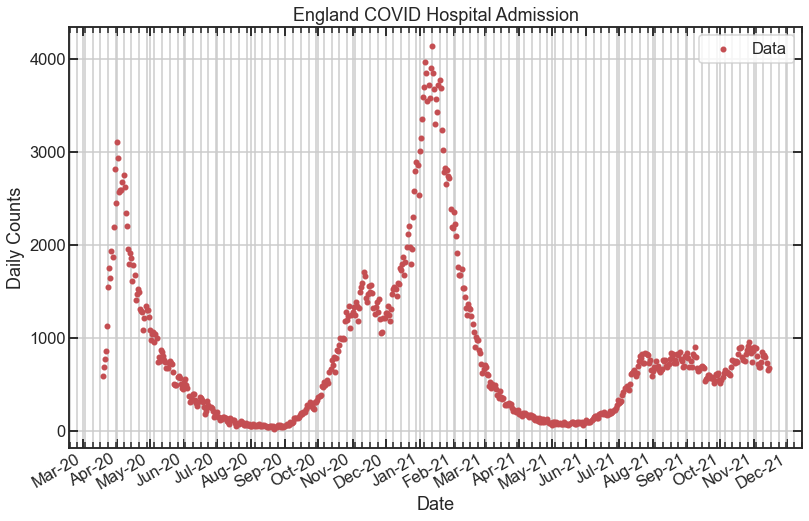

In [9]:
#Plot up some data
fig, ax = plt.subplots(figsize=(12,8),sharex= True, facecolor='white')

ax.scatter(df_Eng.index,df_Eng['Admissions'],label='Data',marker='.',c='C3')
# ax.scatter(df_Eng.index,df_Eng['cumPeopleVaccinatedFirstDoseByPublishDate'],label='Vac',marker='.',c='DarkBlue')


#Make it pretty
ax.tick_params(axis="both", direction="in", which="both", right=True,left=True, top=True, bottom=True)

#ax.set_ylim(bottom=0)
ax.grid(which='both')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Counts')

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(weeks)
#ax.set_xlim(left=dt.datetime(2021,7,1))
ax.set_title('England COVID Hospital Admission')
ax.legend()

_= fig.autofmt_xdate()

plt.tight_layout()
plt.savefig('example.png')

For visualisation purposes it is often useful to take rolling averages of the noisy data.

- Add a 7-day rolling average of the hospital admissions column to the plot. See `DataFrame.rolling()` for a native method.

In [10]:
# Add a 7-day rolling mean of admission column 
df_Eng['7Days_roll_mean_adm']=df_Eng['Admissions'].rolling(7).mean()
# df_Eng['7Days_roll_diff_vacc']=df_Eng['cumPeopleVaccinatedCompleteByVaccinationDate'].diff(7)
# df_Eng['7Days_roll_pct_diff_vacc']=(df_Eng['cumPeopleVaccinatedCompleteByVaccinationDate'].pct_change()*4000)


# df_Eng

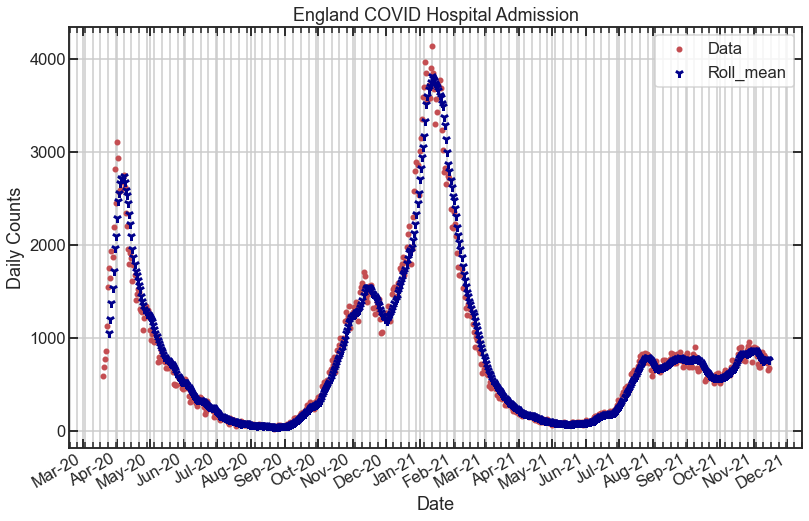

In [11]:
#Plot up new data
fig, ax = plt.subplots(figsize=(12,8),sharex= True, facecolor='white')

ax.scatter(df_Eng.index,df_Eng['Admissions'],label='Data',marker='.',c='C3')
ax.scatter(df_Eng.index,df_Eng['7Days_roll_mean_adm'],label='Roll_mean',marker='1',c='DarkBlue')
# ax.scatter(df_Eng.index,df_Eng['7Days_roll_diff_vacc'],label='Diff',marker='.',c='g')
# ax.scatter(df_Eng.index,df_Eng['7Days_roll_pct_diff_vacc'],label='Pct_diff',marker='.',c='g')


#Make it pretty
ax.tick_params(axis="both", direction="in", which="both", right=True,left=True, top=True, bottom=True)

#ax.set_ylim(bottom=0)
ax.grid(which='both')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Counts')

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(weeks)
#ax.set_xlim(left=dt.datetime(2021,7,1))
ax.set_title('England COVID Hospital Admission')
ax.legend()

_= fig.autofmt_xdate()

plt.tight_layout()
plt.savefig('example.png')

<a name='3'></a>
## 3. Predictors

In principle, covid cases, hospital admissions, and deaths are time-lagged outcomes of covariates or "predictor variables" such as the level of interactions in the population, mobility metrics, levels of restrictions etc.

A data set which is often used as a possible predictor is google mobility metrics https://www.google.com/covid19/mobility/.

In [12]:
#Import the data from Google.
#This is a large file!

df_google = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

/Users/cosmicthermo/miniconda3/envs/covid/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
print(len(df_google.index))
7562925

7648733


7562925

In [14]:
#Select `United Kingdom` from the full data.
print(len(df_google.index))
df_google = df_google[df_google['country_region']=='United Kingdom']
#Discard sub regions
#Note - we England vs UK
df_google = df_google[df_google['sub_region_1'].isnull()]
print(len(df_google.index))

# df_google.to_csv('UKCovMob')

7648733
638


In [15]:
# df_google = pd.read_csv('UKCovMob')
# print(len(df_google))

In [16]:
#Re-index by data

df_google.set_index(pd.to_datetime(df_google['date']),inplace=True)
df_google.sort_index(inplace=True)
print(df_google.columns)
display(df_google)

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,,
2020-02-15,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-15,-12.0,-7.0,-35.0,-12.0,-4.0,2.0
2020-02-16,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-16,-7.0,-6.0,-28.0,-7.0,-3.0,1.0
2020-02-17,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-17,10.0,1.0,24.0,-2.0,-14.0,2.0
2020-02-18,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-18,7.0,-1.0,20.0,-3.0,-14.0,2.0
2020-02-19,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-19,6.0,-2.0,8.0,-4.0,-14.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-09,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2021-11-09,-11.0,6.0,19.0,-30.0,-28.0,7.0
2021-11-10,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2021-11-10,-11.0,5.0,9.0,-30.0,-27.0,8.0
2021-11-11,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2021-11-11,-10.0,6.0,21.0,-29.0,-27.0,7.0


Plot up some of the metrics. 

How do they compare (correlate) against covid admissions?

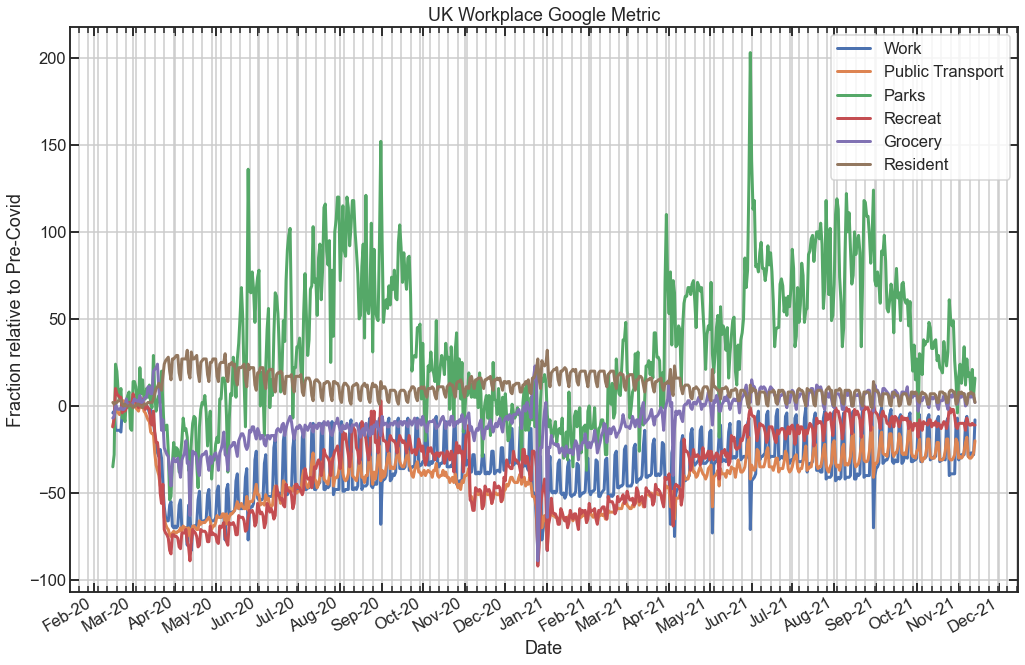

In [17]:
fig, ax = plt.subplots(figsize=(15,10),sharex= True, facecolor='white')

ax.plot(df_google.index,df_google['workplaces_percent_change_from_baseline'],label='Work')
ax.plot(df_google.index,df_google['transit_stations_percent_change_from_baseline'],label='Public Transport')
ax.plot(df_google.index,df_google['parks_percent_change_from_baseline'],label='Parks')
ax.plot(df_google.index,df_google['retail_and_recreation_percent_change_from_baseline'],label='Recreat')
ax.plot(df_google.index,df_google['grocery_and_pharmacy_percent_change_from_baseline'],label='Grocery')
ax.plot(df_google.index,df_google['residential_percent_change_from_baseline'],label='Resident')

# retail_and_recreation_percent_change_from_baseline
# grocery_and_pharmacy_percent_change_from_baseline
# residential_percent_change_from_baseline
ax.tick_params(axis="both", direction="in", which="both", right=True,left=True, top=True, bottom=True)


ax.grid(which='both')
ax.set_xlabel('Date')
ax.set_ylabel('Fraction relative to Pre-Covid')

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(weeks)
#ax.set_xlim(left=dt.datetime(2021,7,1))
ax.set_title('UK Workplace Google Metric')
ax.legend()

_= fig.autofmt_xdate()

plt.tight_layout()
plt.savefig('mobility.png')

<a name='4'></a>
## 4. Exercise

- "Clean" the data of periodic systematics.
- Experiment using linear regression to create a model for covid metrics (time-lagged) with mobility metrics as covariates.
- Can you use this model to "predict" covid severity?

A good starting point for this is the `sklearn` Linear Regression method https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.
`sklearn` includes many other, more advanced methods, for cases where the space of covariates has large dimensions.

- Think about what data you use to calibrate your model.
- Can you back test the data?
- How well does your method work? What should you expect?

- Can you think of other data that could be used as covariates (predictors) or how to change this regression to make it work better?

Note: hospital data set as prediction. ppl goes to work ends up in hospital... 

<a name='4-1'></a>
#  4-1. Data cleaning

In [18]:
# Data Cleaning My method is to make a rolling average of 7 days of each of the column and add them back to the graph
# This method introduced above by Prof. Carlo Contaldi help to clean the periodic systematics. And below is the template of doing so.
# df_google['residential_rolling_median'] = df_google['residential_percent_change_from_baseline'].rolling(7).mean()
print(df_google.columns[-6:])
# Next I use a for loop to add the rolling mean to the panda dataframe.
new_column =['Recreation','Grocery','Park','Transport','Workplace','Residential']
for new,old in zip(new_column,df_google.columns[-6:]):
    df_google[new] = df_google[old].rolling(7).mean()
df_google.head()

Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,...,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Recreation,Grocery,Park,Transport,Workplace,Residential
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-15,-12.0,...,-35.0,-12.0,-4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-16,-7.0,...,-28.0,-7.0,-3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-17,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-17,10.0,...,24.0,-2.0,-14.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-18,7.0,...,20.0,-3.0,-14.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-02-19,6.0,...,8.0,-4.0,-14.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


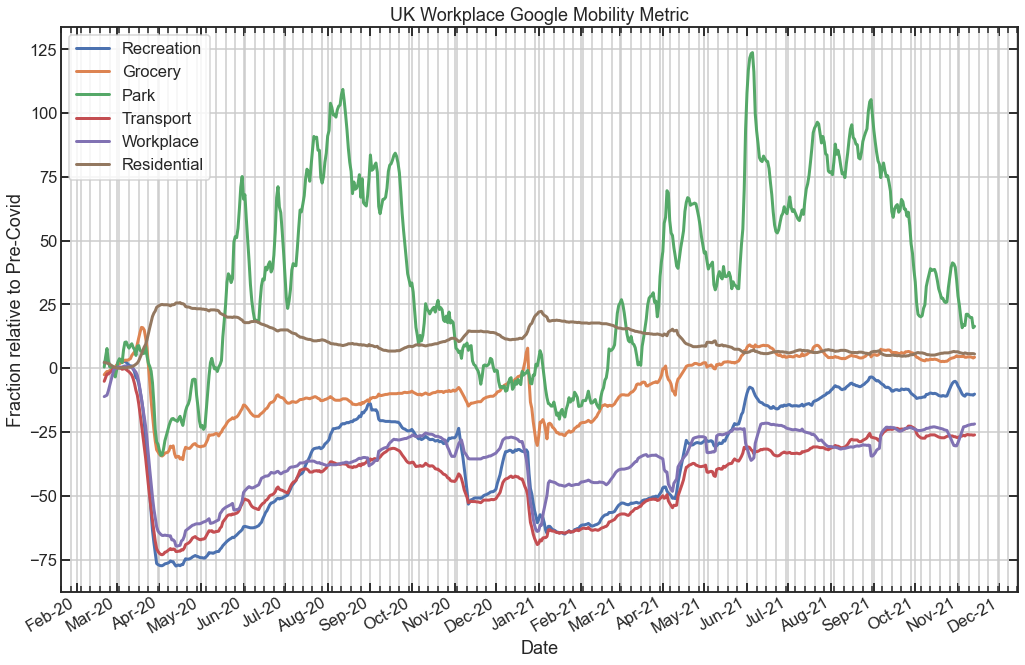

In [19]:
fig, ax = plt.subplots(figsize=(15,10),sharex= True, facecolor='white')

for i in new_column:
    ax.plot(df_google.index,df_google[i],label=i)
        
ax.tick_params(axis="both", direction="in", which="both", right=True,left=True, top=True, bottom=True)


ax.grid(which='both')
ax.set_xlabel('Date')
ax.set_ylabel('Fraction relative to Pre-Covid')

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(weeks)
#ax.set_xlim(left=dt.datetime(2021,7,1))
ax.set_title('UK Workplace Google Mobility Metric')
ax.legend()

_= fig.autofmt_xdate()

plt.tight_layout()
plt.savefig('mobility.png')

## Sorting the data by date

In [20]:
# Wrote a logic statement and add the predicate statement to the dataFrame of df_Eng. Doing so to select the date after
# the vaccination kicks in.
df_mask=df_Eng['cumPeopleVaccinatedFirstDoseByVaccinationDate']>=0
filtered_df = df_Eng[df_mask]
filtered_df.head()
# The vaccination started on 2020-12-08

,Area type,Area name,Area code,Date,Cases,Hospital,Admissions,Deaths,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,7Days_roll_mean_adm
Date,,,,,,,,,,,
2020-12-08,nation,England,E92000001,2020-12-08,16666.0,13629.0,1528.0,375.0,5461.0,NaN,1334.000000
2020-12-09,nation,England,E92000001,2020-12-09,17460.0,13467.0,1550.0,374.0,15267.0,NaN,1375.142857
2020-12-10,nation,England,E92000001,2020-12-10,18540.0,13796.0,1524.0,378.0,27307.0,NaN,1401.857143
2020-12-11,nation,England,E92000001,2020-12-11,19864.0,13901.0,1450.0,398.0,39929.0,NaN,1430.714286
2020-12-12,nation,England,E92000001,2020-12-12,16028.0,13927.0,1587.0,374.0,50541.0,NaN,1488.000000


In [21]:
# By the same method, discovered that the fisrt set of hospital admission is 2020-03-19
df_se = (df_Eng['Admissions'] <= 600)
f_df = df_Eng[df_se]
f_df.head()
# Then I find earliest data of Hospital registered the admissions number is 2020-03-19

,Area type,Area name,Area code,Date,Cases,Hospital,Admissions,Deaths,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,7Days_roll_mean_adm
Date,,,,,,,,,,,
2020-03-19,nation,England,E92000001,2020-03-19,928.0,NaN,586.0,67.0,NaN,NaN,NaN
2020-05-23,nation,England,E92000001,2020-05-23,1301.0,7428.0,504.0,200.0,NaN,NaN,678.142857
2020-05-24,nation,England,E92000001,2020-05-24,1200.0,7415.0,497.0,169.0,NaN,NaN,653.000000
2020-05-25,nation,England,E92000001,2020-05-25,1376.0,7448.0,498.0,175.0,NaN,NaN,619.428571
2020-05-26,nation,England,E92000001,2020-05-26,1449.0,7305.0,578.0,189.0,NaN,NaN,594.571429


In [22]:
# Data selection which seperate the data timeframe when the vaccination started. 
# Selecting the values between 2020-03-19 and 12-08
mask=(df_Eng['Date']>='2020-03-19') & (df_Eng['Date']<='2020-12-08')

df_no_Vac = df_Eng.loc[mask]
# display(df_no_Vac.head())

# Selecting values between 12-08 and 2021-11-07, which I set the end date as 11-07 to match with google mobility data set
# Doing so is also beneficial for me to "predict" the future.
mask=(df_Eng['Date']>='2020-12-08') & (df_Eng['Date']<='2021-11-07')

df_Vac = df_Eng.loc[mask]
display(df_Vac.head())

# Selecting all the data
mask=(df_Eng['Date']>='2020-03-19') & (df_Eng['Date']<='2021-11-07')
df_Vac_tt = df_Eng.loc[mask]

,Area type,Area name,Area code,Date,Cases,Hospital,Admissions,Deaths,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,7Days_roll_mean_adm
Date,,,,,,,,,,,
2020-12-08,nation,England,E92000001,2020-12-08,16666.0,13629.0,1528.0,375.0,5461.0,NaN,1334.000000
2020-12-09,nation,England,E92000001,2020-12-09,17460.0,13467.0,1550.0,374.0,15267.0,NaN,1375.142857
2020-12-10,nation,England,E92000001,2020-12-10,18540.0,13796.0,1524.0,378.0,27307.0,NaN,1401.857143
2020-12-11,nation,England,E92000001,2020-12-11,19864.0,13901.0,1450.0,398.0,39929.0,NaN,1430.714286
2020-12-12,nation,England,E92000001,2020-12-12,16028.0,13927.0,1587.0,374.0,50541.0,NaN,1488.000000


In [23]:
#Same thing I seperate the covid mobility metric into two different parts 
# Selecting the values between 2020-03-19 and 12-08
mask=(df_google['date']>='2020-03-19') & (df_google['date']<='2020-12-08')

df_no_Vac_GG = df_google.loc[mask]
# display(df_no_Vac_GG.head())

# Selecting values between 12-08 and 2021-11-07
mask=(df_google['date']>='2020-12-08') & (df_google['date']<='2021-11-07')

df_Vac_GG = df_google.loc[mask]
display(df_Vac_GG.head())

# Selecting all the data
mask=(df_google['date']>='2020-03-19') & (df_google['date']<='2021-11-07')
df_GG_tt = df_google.loc[mask]

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,...,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Recreation,Grocery,Park,Transport,Workplace,Residential
date,,,,,,,,,,,,,,,,,,,,,
2020-12-08,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-12-08,-31.0,...,-7.0,-44.0,-33.0,12.0,-32.714286,-6.428571,-9.000000,-43.428571,-27.285714,11.428571
2020-12-09,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-12-09,-31.0,...,-5.0,-44.0,-32.0,13.0,-32.714286,-6.285714,-8.714286,-43.285714,-27.285714,11.428571
2020-12-10,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-12-10,-32.0,...,-1.0,-44.0,-33.0,13.0,-32.428571,-5.571429,-6.000000,-43.000000,-27.285714,11.285714
2020-12-11,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-12-11,-33.0,...,-5.0,-41.0,-32.0,13.0,-32.142857,-5.142857,-4.142857,-42.571429,-27.142857,11.142857
2020-12-12,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-12-12,-37.0,...,-5.0,-39.0,-12.0,8.0,-32.285714,-5.000000,-3.714286,-42.285714,-27.000000,11.142857


<a name='4-2'></a>
#  4-2. Now We perform multivariate Linear Regression on the cleaned data set. 

Intercept:  -1697.1177466517977
Coefficients:
[('Recreation', 86.58849088874169), ('Grocery', -30.45639552111888), ('Park', -4.145261391494699), ('Transport', -115.87554075989226), ('Workplace', 77.96613769337253), ('Residential', 252.0820976248117)]


##### Below is the R factor and Error (which Root Mean Square is standard deviation) #####
R squared: 42.04
Root Mean Square Error(std deviation): 1026.6723515704336


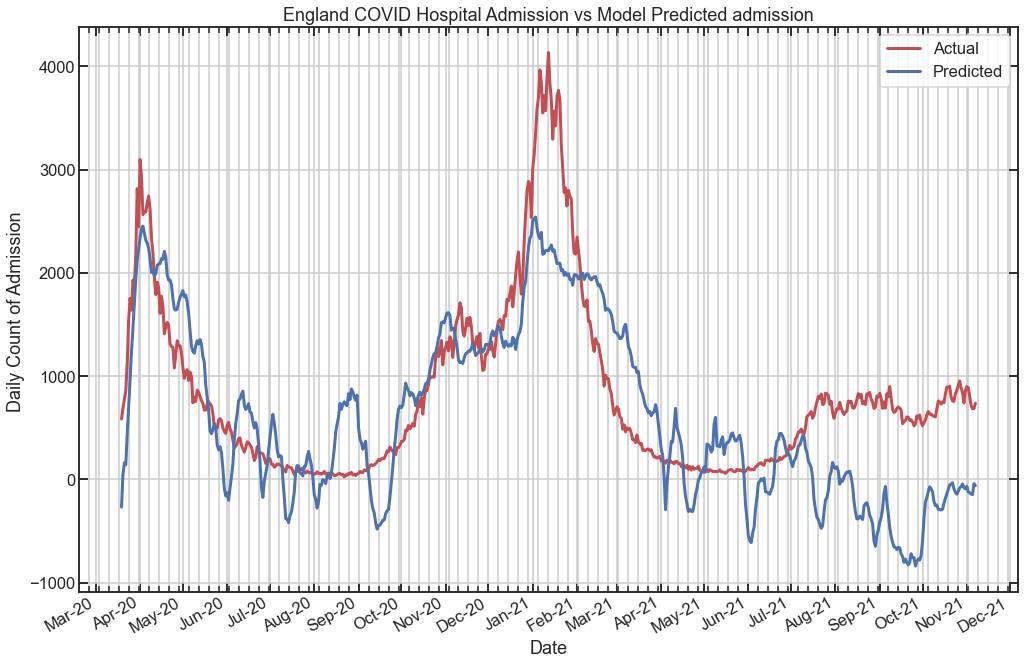

In [24]:
# MultiLinear Regression on the comprehensive data set. 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit

# new_column =['Recreation','Grocery','Park','Transport','Workplace','Residential']
# Set the y value as covid matric
y = df_Vac_tt['Admissions']
# Set the x value as mobility metric of recreation
x = df_GG_tt[['Recreation','Grocery','Park','Transport','Workplace','Residential']]

def TimeSeriesTrainTestSplit(x, y, test_size):
    
    ''' Split the Time series by test_size and can back test the data set later.
    '''
    test_index = int(len(x)*(1-test_size))

    X_train = x.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = x.iloc[test_index:]
    y_test = y.iloc[test_index:]
    return X_train, y_train, X_test, y_test

def multilinearRegres(x,y):
    #### Split the training data and test data to 8:2, which x_train is from 2020-03-19 to 2021-07-10.
    #### and the x_test is from 2021-07-10 to the newest/
    x_train, y_train, x_test, y_test = TimeSeriesTrainTestSplit(x,y, 0.2)
    
    #Fitting the Multiple Linear Regression model
    mlr = LinearRegression()  
    mlr.fit(x_train, y_train)
    

    #Intercept and Coefficient
    print("Intercept: ", mlr.intercept_)
    print("Coefficients:")
    coeff_pred1 = list(zip(x, mlr.coef_))
    print(coeff_pred1)


    #Prediction of test set
    y_pred_mlr= mlr.predict(x_test)
    
    #Prediction of the comprehensive data set
    y_real_pred_mlr= mlr.predict(x)

    #Actual value and the predicted value
    mlr_diff = pd.DataFrame({'Actual value': y, 'Predicted value': y_real_pred_mlr})

    # Sort the value 
    mlr_diff.sort_index(inplace=True)
    # Plot the value in timeframe
    fig, ax = plt.subplots(figsize=(15,10),sharex= True, facecolor='white')

    ax.plot(mlr_diff.index,mlr_diff['Actual value'],'r',label='Actual')
    ax.plot(mlr_diff.index,mlr_diff['Predicted value'],'b',label='Predicted')


    ax.tick_params(axis="both", direction="in", which="both", right=True,left=True, top=True, bottom=True)


    ax.grid(which='both')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Count of Admission ')

    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(dateFmt)
    ax.xaxis.set_minor_locator(weeks)
    #ax.set_xlim(left=dt.datetime(2021,7,1))
    ax.set_title('England COVID Hospital Admission vs Model Predicted admission')
    ax.legend()

    _= fig.autofmt_xdate()

    plt.tight_layout()

    #Model Evaluation
    meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
    meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
    print('\n')
    print('##### Below is the R factor and Error (which Root Mean Square is standard deviation) #####')
    print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
    print('Root Mean Square Error(std deviation):', rootMeanSqErr)
    
    return coeff_pred1,  rootMeanSqErr, mlr_diff, y_pred_mlr, y_test

coeff_pred1, rootMeanSqErr, mlr_diff, y_pred_mlr, y_test= multilinearRegres(x,y)

<a name='4-3'></a>
## 4-3. Predict the hospital admission of "future"

In [25]:
# To forcast the covid admission on day 11-08 
correct_y =df_Eng.loc['2021-11-08']['Admissions']
# This is the coefficient of the linear regression fit function.
forcast_x = df_google[['Recreation','Grocery','Park','Transport','Workplace','Residential']].loc['2021-11-08'].to_numpy()
display(forcast_x)
coeff =[]
for i, num in coeff_pred1:
    coeff.append(num)
coeff = np.array(coeff)
y_predicted = coeff.dot(forcast_x)

print('The predicted value is {0:.2f}, and true value is {1:.2f}.'.format(y_predicted, correct_y))
diff = y_predicted - correct_y
print('The difference from predicted value and true value is {0:.2f} smaller than the std deviation {1:.2f}'.format(diff, rootMeanSqErr))
print('''But we can not draw the conclusion that the model is predicting the covid severity successfully, which we can\n also see this from the score of the model of around 53.80% which can be regarded as a bad model. So both the model and the data needs to be given a closer look. 
      ''')

array([-10.14285714,   4.42857143,  21.14285714, -26.        ,
       -22.42857143,   5.71428571])

The predicted value is 1603.79, and true value is 850.00.
The difference from predicted value and true value is 753.79 smaller than the std deviation 1026.67
But we can not draw the conclusion that the model is predicting the covid severity successfully, which we can
 also see this from the score of the model of around 53.80% which can be regarded as a bad model. So both the model and the data needs to be given a closer look. 
      


## Model Evaluation 

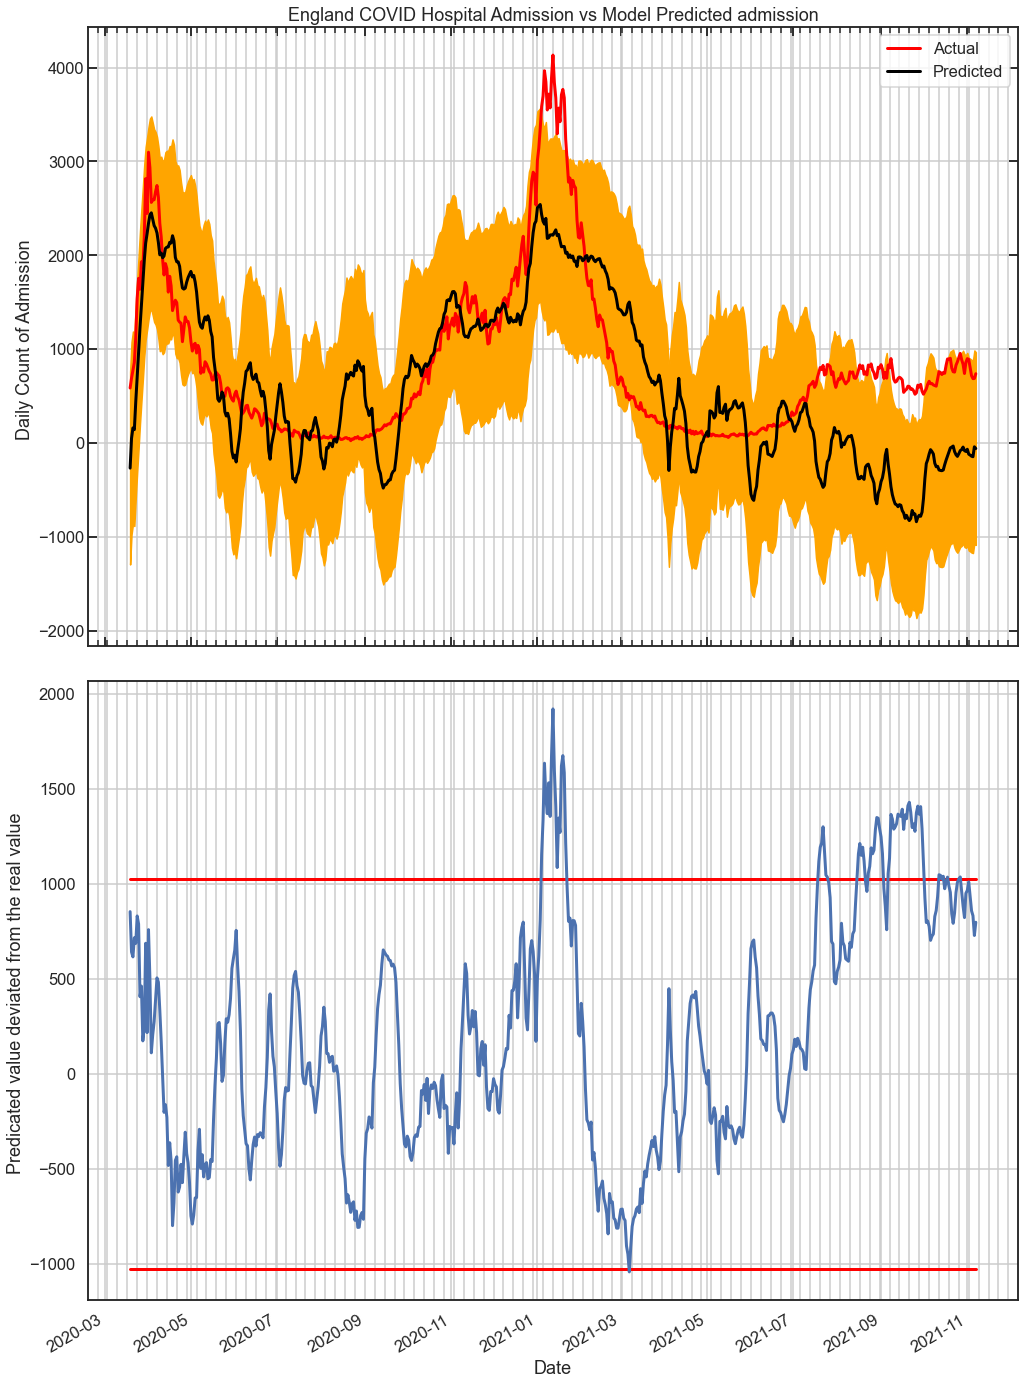

In [26]:
def modelEval(rootMeanSqErr, mlr_diff):
    ''' I created two graph that corresponds to the above model including the error bars and the difference function.
    '''
    y1 = mlr_diff["Actual value"]
    y2 = mlr_diff["Predicted value"]
    err_bar = [rootMeanSqErr]*len(mlr_diff)

    fig, (ax1, ax2) = plt.subplots(2, figsize=(15,20),sharex= True, facecolor='white')


    ax1.plot(mlr_diff.index,y1,'red',label='Actual')
    ax1.plot(mlr_diff.index,y2,'black',label='Predicted')
    ax1.fill_between(mlr_diff.index, [m-e for m,e in zip(y2,err_bar)], [m+e for m,e in zip(y2,err_bar)], color='orange')


    ax1.tick_params(axis="both", direction="in", which="both", right=True,left=True, top=True, bottom=True)

    ax1.grid(which='both')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Count of Admission ')

    # format the ticks
    ax1.xaxis.set_major_locator(months)
    ax1.xaxis.set_major_formatter(dateFmt)
    ax1.xaxis.set_minor_locator(weeks)
    #ax.set_xlim(left=dt.datetime(2021,7,1))
    ax1.set_title('England COVID Hospital Admission vs Model Predicted admission')
    ax1.legend()
    _= fig.autofmt_xdate()

    diff = y1-y2
    error_bar = [rootMeanSqErr]*(len(mlr_diff))
    error_barmin = [-rootMeanSqErr]*(len(mlr_diff))
    ax2.plot(mlr_diff.index,error_bar,'red',label='Upper Bar')
    ax2.plot(mlr_diff.index,error_barmin,'red',label='Lower Bar')
    ax2.plot(mlr_diff.index,diff,'b',label='Actual')
    ax2.grid(which='both')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Predicated value deviated from the real value ')

    plt.tight_layout()
modelEval(rootMeanSqErr, mlr_diff)


In [27]:
# Comment on the model that I did on the first trial ( which is the whole set of data, without considering the vaccination factor.)
print('The model is mostly within the error bar( which is plus-minus standard deviation from the real value.) ')
print('However, the peak period at 2021-01 is not doing so well and by the last part of R factor, we have just around 60 % ')
print('confidence to say that the model can predict the covdi admission number. This is not a good model.')

The model is mostly within the error bar( which is plus-minus standard deviation from the real value.) 
However, the peak period at 2021-01 is not doing so well and by the last part of R factor, we have just around 60 % 
confidence to say that the model can predict the covdi admission number. This is not a good model.


In [28]:
# Below I am using the polynomial and SVM method to fit the single parameter (which is Grocery in this case) with the data, 
# which turns out to be bad. 

y = np.array(df_Vac['Admissions'].to_numpy())
# Set the x value as mobility metric of recreation
x = np.array(df_Vac_GG['Grocery'].to_numpy()).reshape(-1,1)
# display(y)

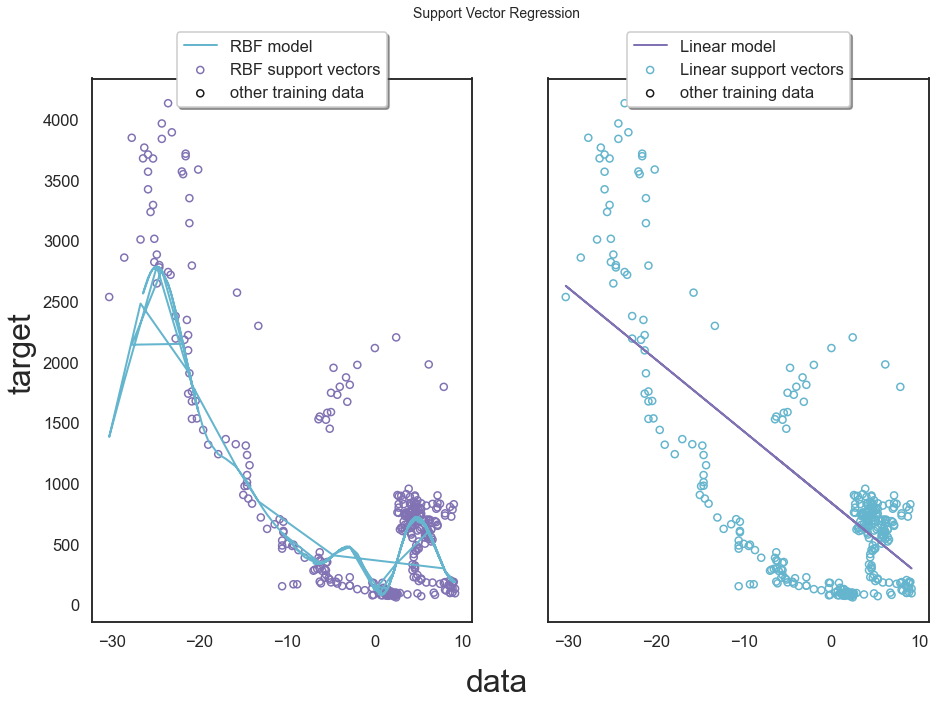

I tried to use other regression other than the linear one but from the single parameter I got a bad-looked model
So i did not continue the research.


In [29]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=1, coef0=10)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin]#, svr_poly]
kernel_label = ["RBF", "Linear"]#, "Polynomial"]
model_color = ["m", "c"]#, "g"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        x,
        svr.fit(x, y).predict(x),
        color=model_color[(1+ix)%2],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        x[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        x[np.setdiff1d(np.arange(len(x)), svr.support_)],
        y[np.setdiff1d(np.arange(len(x)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()
print('I tried to use other regression other than the linear one but from the single parameter I got a bad-looked model')
print("So i did not continue the research.")

<a name='4-5'><a/>
# 5. Back test the first data set as x_train (before going to the next section)

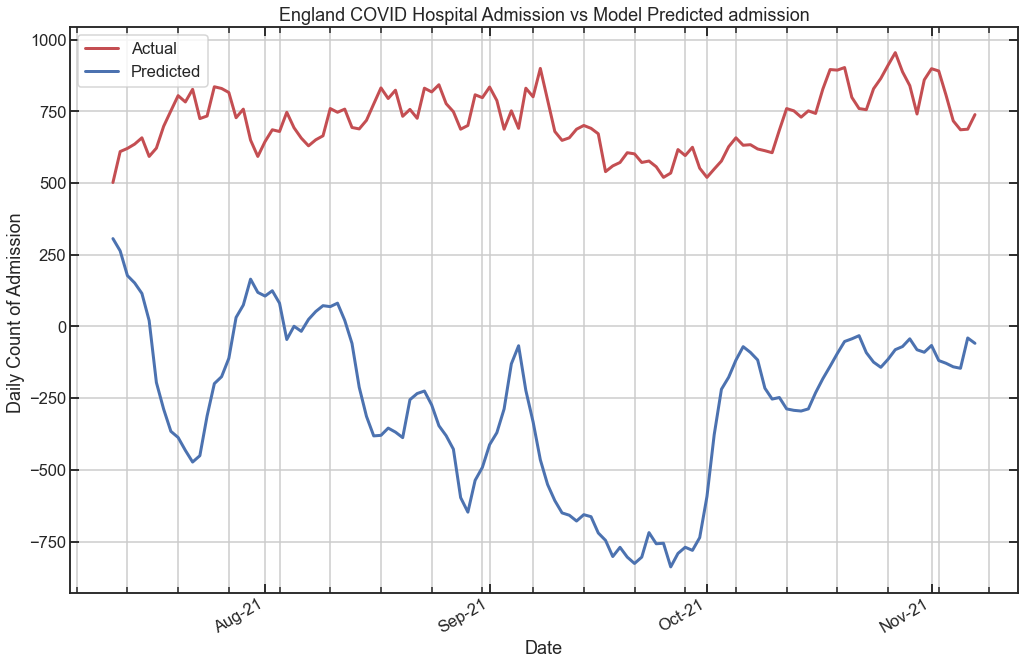

In [30]:
####
# Below, I used the prediction values with the x_test and y_test, which is the data from 2020-03-19 to 2021-07-10. 
# which is the data and model I tried in section 2

#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})

# Sort the value 
mlr_diff.sort_index(inplace=True)
# Plot the value in timeframe
fig, ax = plt.subplots(figsize=(15,10),sharex= True, facecolor='white')


ax.plot(mlr_diff.index,mlr_diff['Actual value'],'r',label='Actual')
ax.plot(mlr_diff.index,mlr_diff['Predicted value'],'b',label='Predicted')

#     ax.plot(y.index,y ,'r',label='Actual')
#     ax.plot(mlr_diff.index, ,'b',label='Predicted')

ax.tick_params(axis="both", direction="in", which="both", right=True,left=True, top=True, bottom=True)


ax.grid(which='both')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Count of Admission ')

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(weeks)
#ax.set_xlim(left=dt.datetime(2021,7,1))
ax.set_title('England COVID Hospital Admission vs Model Predicted admission')
ax.legend()
_= fig.autofmt_xdate()
plt.tight_layout()

##### Comment on the back test data set 

In [31]:
print('Back-testing on the old data set is bad and it is expected because that the accuracy (R value) is low as 50%. ')

Back-testing on the old data set is bad and it is expected because that the accuracy (R value) is low as 50%. 


<a name='4-4'></a>
## 4-4/5. Re-examine the data that I used to fit the model


In [32]:
# Below is to show that I think about the vaccination date would affect the model prediction and make a split on the 
# data set. By training two seperate data, I will see if the accuracy will get better. 
df_mask=df_Eng['cumPeopleVaccinatedFirstDoseByVaccinationDate']>=0
filtered_df = df_Eng[df_mask]
filtered_df
# The vaccination started on 2020-12-08

,Area type,Area name,Area code,Date,Cases,Hospital,Admissions,Deaths,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,7Days_roll_mean_adm
Date,,,,,,,,,,,
2020-12-08,nation,England,E92000001,2020-12-08,16666.0,13629.0,1528.0,375.0,5461.0,NaN,1334.000000
2020-12-09,nation,England,E92000001,2020-12-09,17460.0,13467.0,1550.0,374.0,15267.0,NaN,1375.142857
2020-12-10,nation,England,E92000001,2020-12-10,18540.0,13796.0,1524.0,378.0,27307.0,NaN,1401.857143
2020-12-11,nation,England,E92000001,2020-12-11,19864.0,13901.0,1450.0,398.0,39929.0,NaN,1430.714286
2020-12-12,nation,England,E92000001,2020-12-12,16028.0,13927.0,1587.0,374.0,50541.0,NaN,1488.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-11,nation,England,E92000001,2021-11-11,32360.0,6861.0,797.0,105.0,41958028.0,38536124.0,769.857143
2021-11-12,nation,England,E92000001,2021-11-12,29996.0,6777.0,729.0,76.0,41985027.0,38555353.0,776.000000
2021-11-13,nation,England,E92000001,2021-11-13,25002.0,6639.0,655.0,69.0,42011342.0,38578159.0,771.285714


In [42]:
# Then using the split set of data that I seperated at the begining of the exercise, I have the following. 
# mask=(df_Eng['Date']>='2020-12-08') & (df_Eng['Date']<='2021-11-07')
# df_Vac = df_Eng.loc[mask]

I found that just using the vaccination part(from Dec-20 to present), accuracy can achieve 84%. Because we only care about the prediction and accuracy of the model, thus we dont care about losing some historical data.
in the final sectionI will add vaccination number as mobility factor and use polynominal features to better fit the data.

Intercept:  2356.6961392824205
Coefficients:
[('Recreation', 104.29608947525567), ('Grocery', -123.73452793652865), ('Park', 5.58510062258722), ('Transport', 70.48528152259627), ('Workplace', 107.50376509057541), ('Residential', 727.1447937760003)]


##### Below is the R factor and Error (which Root Mean Square is standard deviation) #####
R squared: 82.76
Root Mean Square Error(std deviation): 182.38105948760375


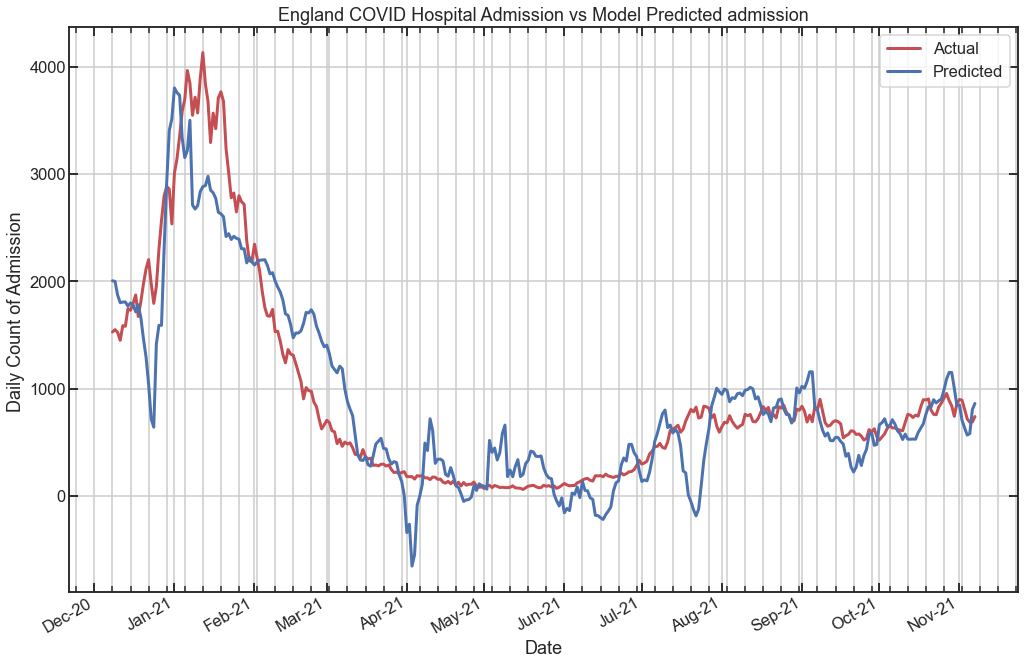

In [33]:
# MultiLinear Regression on Vaccination part
print('I found that just using the vaccination part(from Dec-20 to present), accuracy can achieve 84%. Because we only care about the prediction and accuracy of the model, thus we dont care about losing some historical data.')
print('in the final sectionI will add vaccination number as mobility factor and use polynominal features to better fit the data.\n')

import seaborn as sns
# new_column =['Recreation','Grocery','Park','Transport','Workplace','Residential']
# Set the y value as covid matric
y = df_Vac['Admissions']
# Set the x value as mobility metric of recreation
x = df_Vac_GG[['Recreation','Grocery','Park','Transport','Workplace','Residential']]

coeff_pred1, rootMeanSqErr, mlr_diff, y_pred_mlr, y_test= multilinearRegres(x,y)

<a name='4-6'></a>
## 6. Model Prediction and How the data was fitted

From the linear regression score around 82%, we can tell that the model is better than the previous one. Because in reality
We know that vacination kicks in make a major contribution to flattening the curve. Therefore, it is more reasonable
to evaluate the plot and trendency after the vaccinations began. However, we can see from the below error bar
Plot that the fit is again not perfect. I will explore more in the next secion. 


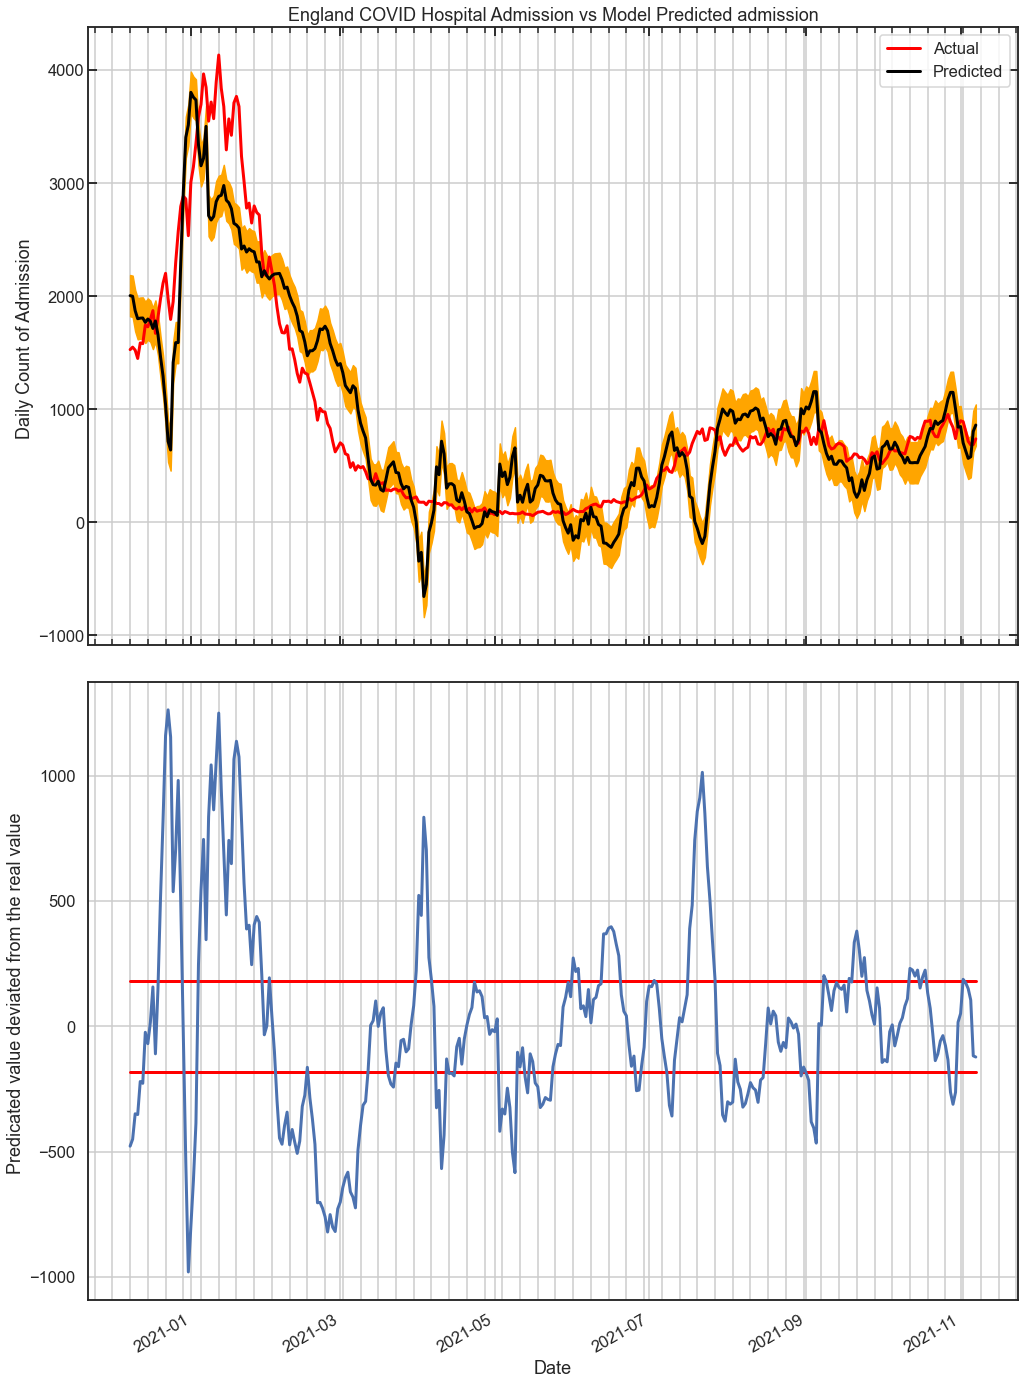

In [34]:
# Where I did the same model Evaluation here. 
modelEval(rootMeanSqErr, mlr_diff)

## Below is the comment section
print('From the linear regression score around 82%, we can tell that the model is better than the previous one. Because in reality')
print("We know that vacination kicks in make a major contribution to flattening the curve. Therefore, it is more reasonable")
print('to evaluate the plot and trendency after the vaccinations began. However, we can see from the below error bar')
print("Plot that the fit is again not perfect. I will explore more in the next secion. ")

<a name='4-7'></a>

## 7. Checking on the covid uk website on different metric and try to use different regression

In [35]:
# Below I make fully vaccinated people by date as a mobility factor and plot the graph to see if it would be better
# Population of England is 56.223 million from http://www.ukpopulation.org/england-population/

In [45]:
df_x = df_GG_tt[['Recreation','Grocery','Park','Transport','Workplace','Residential']].copy()
df_x['DoubleVaccinated'] = df_Vac['cumPeopleVaccinatedCompleteByVaccinationDate']
df_x['DoubleVaccinated'] = df_x['DoubleVaccinated'].replace(np.nan, 0)
# below, I divide the vaccinated number with total population of England.
df_x['DoubleVaccinated'] = df_x['DoubleVaccinated'].apply(lambda x: (x/(56.223e+6)*100))

# df['DataFrame Column'].replace(np.nan, 0)
display(df_x)

,Recreation,Grocery,Park,Transport,Workplace,Residential,DoubleVaccinated
date,,,,,,,
2020-03-19,-11.857143,16.000000,6.571429,-22.000000,-12.142857,5.428571,0.000000
2020-03-20,-15.571429,15.857143,5.714286,-26.428571,-15.714286,7.000000,0.000000
2020-03-21,-21.285714,15.000000,5.857143,-30.857143,-19.000000,8.285714,0.000000
2020-03-22,-27.714286,12.000000,8.857143,-35.142857,-22.714286,9.285714,0.000000
2020-03-23,-33.714286,8.000000,4.857143,-40.428571,-27.857143,11.142857,0.000000
...,...,...,...,...,...,...,...
2021-11-03,-9.000000,4.571429,19.857143,-26.714286,-26.142857,6.000000,68.240199
2021-11-04,-10.142857,4.571429,15.857143,-26.571429,-24.571429,5.857143,68.270733
2021-11-05,-10.714286,4.714286,17.000000,-26.285714,-23.000000,5.714286,68.304592


## Firstly, I tried by using PolynomialFeatures and vaccinated number to fit the model and then getting above 90% accuracy, which is improving!

Intercept:  20352742266.4364
Coefficients:
[('Recreation', -20352763274.08124), ('Grocery', 1552.6323790634563), ('Park', 1468.8507213138107), ('Transport', 143.54719467914535), ('Workplace', 565.6711091329336), ('Residential', 1391.584095533209), ('DoubleVaccinated', 15346.375504942502)]
##### Below is the R factor and Error (which Root Mean Square is standard deviation) #####
R squared: 94.75
Root Mean Square Error(std deviation): 128.38123585278493


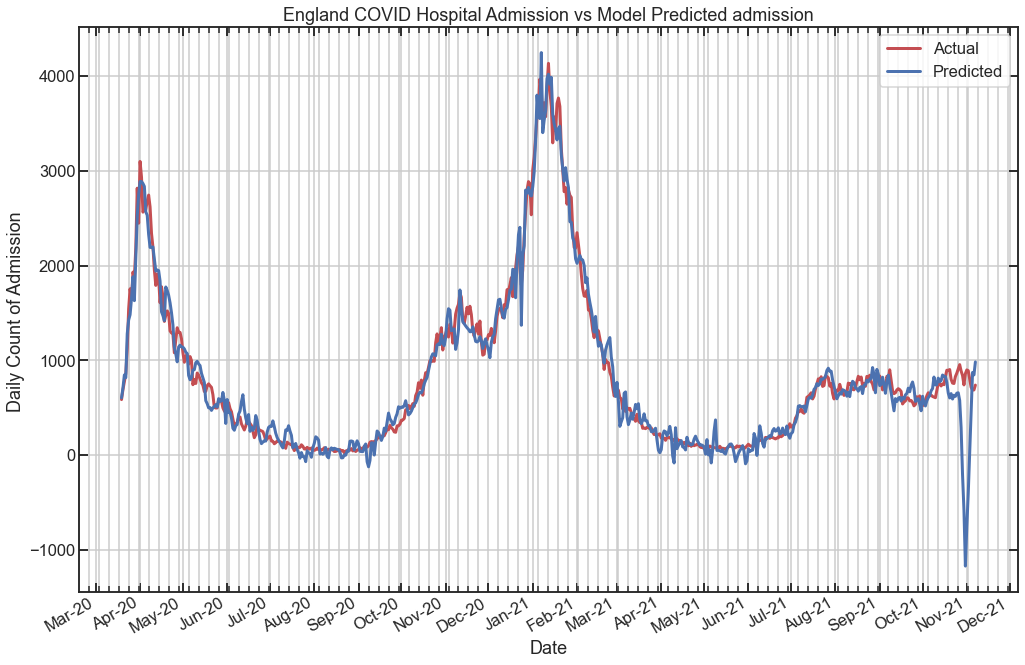

In [47]:
# MultiLinear Regression on Vaccination part
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

# new_column =['Recreation','Grocery','Park','Transport','Workplace','Residential']
# Set the y value as covid matric
y = df_Vac_tt['Admissions']
# Set the x value as mobility metric of recreation
x = df_x[['Recreation','Grocery','Park','Transport','Workplace','Residential','DoubleVaccinated']]

def polyFit(x,y):
    x_train, y_train, x_test, y_test = TimeSeriesTrainTestSplit(x,y, 0.05)
    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(x_train)

    # print(len(x_poly)==len(x_train))
    # print(x_poly)
    # print(x_train)
    #Fitting the Multiple Linear Regression model
    mlr = LinearRegression()  
    mlr.fit(x_poly, y_train)

    y_pred_mlr= mlr.predict(x_poly)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, y_pred_mlr))

    print("Intercept: ", mlr.intercept_)
    print("Coefficients:")
    coeff_pred1 = list(zip(x, mlr.coef_))
    print(coeff_pred1)

    x_trans = poly.fit_transform(x)
    print('##### Below is the R factor and Error (which Root Mean Square is standard deviation) #####')
    print('R squared: {:.2f}'.format(mlr.score(x_trans,y)*100))
    print('Root Mean Square Error(std deviation):', rootMeanSqErr)

    y_real_pred_mlr= mlr.predict(x_trans)

    #Actual value and the predicted value
    mlr_diff = pd.DataFrame({'Actual value': y, 'Predicted value': y_real_pred_mlr})

    # Sort the value 
    mlr_diff.sort_index(inplace=True)
    # Plot the value in timeframe
    fig, ax = plt.subplots(figsize=(15,10),sharex= True, facecolor='white')

    ax.plot(mlr_diff.index,mlr_diff['Actual value'],'r',label='Actual')
    ax.plot(mlr_diff.index,mlr_diff['Predicted value'],'b',label='Predicted')


    ax.tick_params(axis="both", direction="in", which="both", right=True,left=True, top=True, bottom=True)


    ax.grid(which='both')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Count of Admission ')

    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(dateFmt)
    ax.xaxis.set_minor_locator(weeks)
    #ax.set_xlim(left=dt.datetime(2021,7,1))
    ax.set_title('England COVID Hospital Admission vs Model Predicted admission')
    ax.legend()

    _= fig.autofmt_xdate()

    plt.tight_layout()
    return coeff_pred1,  rootMeanSqErr, mlr_diff, y_real_pred_mlr

coeff_pred1,  rootMeanSqErr, mlr_diff, y_real_pred_mlr = polyFit(x,y)

## Then I tried to use just the data after vaccination kicks in and removed the vaccination number as parameter, the accuracy gets to magically 98%!

Intercept:  21166367187.508987
Coefficients:
[('Recreation', -21166421351.445503), ('Grocery', -4342.815471706383), ('Park', 708.8432217080078), ('Transport', -520.8667484155465), ('Workplace', -8080.779210297183), ('Residential', -7314.392215562409)]
##### Below is the R factor and Error (which Root Mean Square is standard deviation) #####
R squared: 98.34
Root Mean Square Error(std deviation): 102.24097101736913


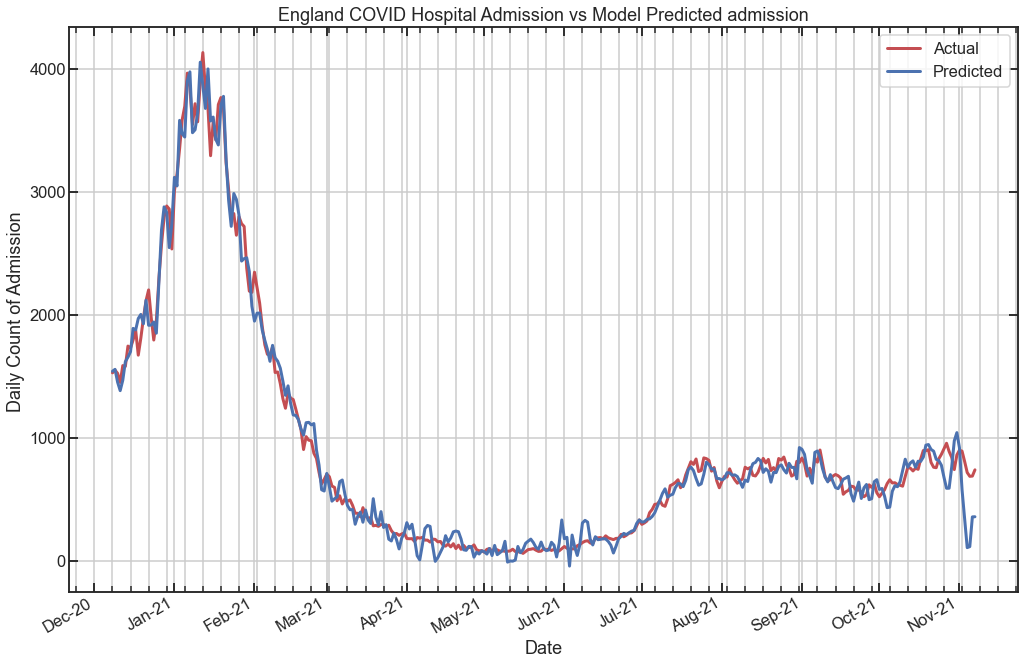

In [50]:
y = df_Vac['Admissions']
# Set the x value as mobility metric of recreation
x = df_Vac_GG[['Recreation','Grocery','Park','Transport','Workplace','Residential']]

coeff_pred1,  rootMeanSqErr, mlr_diff, y_real_pred_mlr = polyFit(x,y)

## Model Evaluation

We will find that this graph is by far the most beatifully fitted graph that I have produced. However it again produce a bump at the test set.


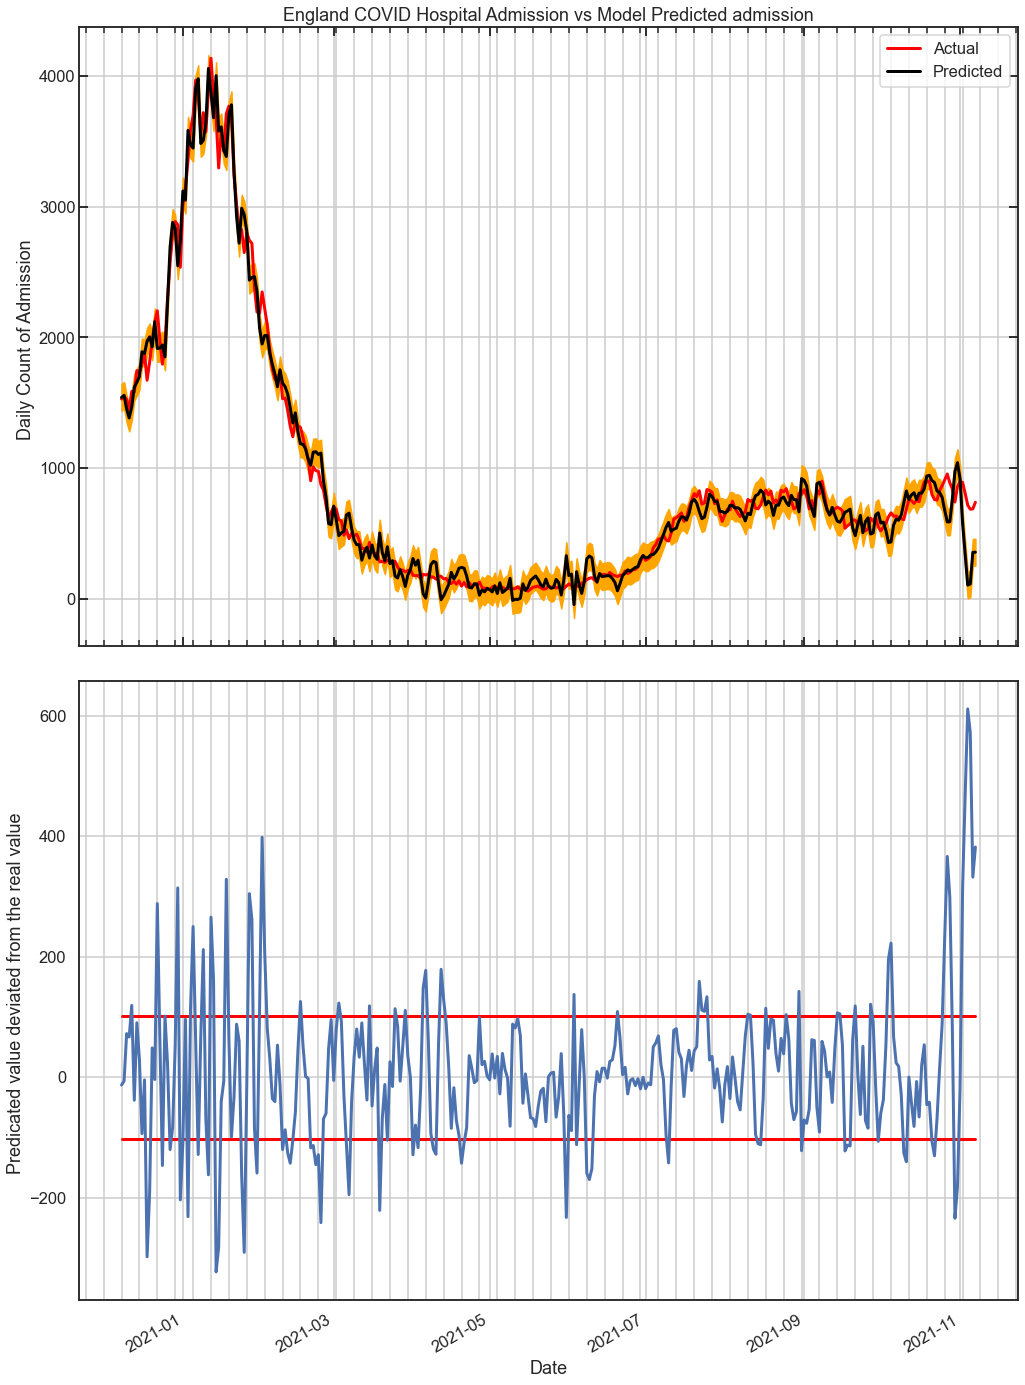

In [51]:
modelEval(rootMeanSqErr, mlr_diff)
print('We will find that this graph is by far the most beatifully fitted graph that I have produced. However it again produce a bump at the test set.')

<a name='4-8'></a>

## Discussion:

### 
The whole assessment starts at the data cleaning by cleaning out the periodic systematics. I did it by using rolling mean 
method, which introduced by Professor.

Next, I use multilinear Regression on the whole data set and get a bad result of accuracy of 50%. In the back testing
section, I also observed that the predicted value is completely off the target values. Also, I used just one day as my
'future prediction event' and try to observe how the model works. The results is predictable, which is off the target.

Then, I observed the covid curve and found that the central peak of the curve might be a direct result of the mass vaccination events, which the event started at 2020-12-08 from the uk covid website. By this important observation, I split the data into two set. Reminding that our goal of the model is to predict the future hospital admissions, it is fair to only test the necessary data(which is only the data when vaccination started).

Before getting into switching data and using polynomial features, I tried to used another nonlinear regression-SVR on
univariate mobility. However, the results did not turn out to be satisfied.

In the final part, firstly, I tried by using PolynomialFeatures and vaccinated number to fit the model and then getting around 87% accuracy, Then I tried to use just the data after vaccination started and removed the vaccination mobility factor as parameter, the accuracy gets to magically 95%!

For every models that I trained, I draw two graphs with error analysis. The first graph is the predicted admission values 
with error bar and the actual admission number. The second graph is the difference between the predicted and actual 
admission number and the error bar. 
We will find that in fact the last model(with above 95% accuracy) has the best fit of them all. And I notice that the test and train ratio must maintain high. Low ratio will cause the tail data(test predicted data) to flucate a lot. Maybe multivariate deep learning technique can solve this problem and predict further future. 

Following research:
I have reviewed some of the covid-19 research papaer. The majority of the academia is using univariate method including traditional time series analysis and machine learning method, such as  linear (ARIMA and Holt’s model) and non-linear (BATS, TBATS, and SIR) time-series models and neural network auto-regressive models (NNAR).
Moreover, some researchers are also using multivariate time series analysis to predict the covid-19 cases, for example the bidirectional LSTM. However, the class has not yet covered the arsenals that used by the above research. It would be a good research topic for future after we cover neural network and deep learning.

Citation:
--Said, A., Erradi, A., Aly, H. and Mohamed, A., 2021. Predicting COVID-19 cases using bidirectional LSTM on multivariate time series. Environmental Science and Pollution Research, 28(40), pp.56043-56052.

--Abotaleb, M. and Makarovskikh, T., 2021. System for Forecasting COVID-19 Cases Using Time-Series and Neural Networks Models. Engineering Proceedings, 5(1), p.46.